In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import norm

In [2]:
people_data = pd.read_csv("./train.csv")

1-1 Describe: Provides a summary of the data frame, including the number of all samples, the minimum and maximum value of each column, and the percentile.

In [3]:
people_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,29825.000000,2.982500e+04,29825.000000,29825.000000,29825.000000,29825.000000
mean,38.581425,1.897389e+05,10.079229,1094.586052,86.476513,40.434334
std,13.652005,1.053738e+05,2.571678,7485.908646,401.195078,12.308174
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.368790e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1-2 Head: Represents  the first 5 samples of the dataframe. 

In [4]:
people_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1-3 Tail: Represents the last 5 samples of the dataframe. 

In [5]:
people_data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
29820,48,Local-gov,127921,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
29821,32,Private,42617,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,30,United-States,<=50K
29822,47,Local-gov,191389,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
29823,38,Private,187983,Prof-school,15,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,<=50K
29824,18,Private,215110,HS-grad,9,Never-married,Handlers-cleaners,Own-child,Black,Male,0,0,40,United-States,<=50K


1-4 Info: Prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [6]:
people_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29825 non-null  int64 
 1   workclass       28154 non-null  object
 2   fnlwgt          29825 non-null  int64 
 3   education       29825 non-null  object
 4   education-num   29825 non-null  int64 
 5   marital-status  29825 non-null  object
 6   occupation      28149 non-null  object
 7   relationship    29825 non-null  object
 8   race            29825 non-null  object
 9   sex             29825 non-null  object
 10  capital-gain    29825 non-null  int64 
 11  capital-loss    29825 non-null  int64 
 12  hours-per-week  29825 non-null  int64 
 13  native-country  29288 non-null  object
 14  salary          29825 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


In [35]:
#people_data['marital-status'].head(50)
print(people_data['race'].unique())

[4 2 1 0 3]


2 Label encoding the categorical columns

In [8]:
people_data._get_numeric_data().columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

3-1 Find number of NaN values in each column

In [9]:
people_data.isna().sum()

age                  0
workclass         1671
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1676
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     537
salary               0
dtype: int64

3-2 Replace the NaN values with Mean for numerical colunms and with Mode for categorical columns.

In [10]:
numeric_columns = people_data.select_dtypes(include=['number']).columns
people_data[numeric_columns] = people_data[numeric_columns].fillna(people_data.mean(numeric_only=True))

Categorical_columns = people_data.select_dtypes(exclude=['number']).columns.difference(['salary'])
befor_fill_nan = people_data[Categorical_columns]
people_data[Categorical_columns] = people_data[Categorical_columns].transform(lambda a: a.fillna(a.mode()[0]))
after_fill_nan = people_data[Categorical_columns]

In [11]:
befor_fill_nan.loc[590:600]

,education,marital-status,native-country,occupation,race,relationship,sex,workclass
590,HS-grad,Married-civ-spouse,United-States,NaN,White,Husband,Male,NaN
591,HS-grad,Married-civ-spouse,United-States,NaN,Asian-Pac-Islander,Wife,Female,NaN
592,7th-8th,Never-married,United-States,Transport-moving,White,Not-in-family,Male,Private
593,Bachelors,Married-civ-spouse,Canada,Prof-specialty,White,Husband,Male,Private
594,Bachelors,Never-married,United-States,Adm-clerical,White,Own-child,Female,Private
595,HS-grad,Never-married,United-States,Sales,White,Own-child,Male,Private
596,Some-college,Never-married,United-States,NaN,Amer-Indian-Eskimo,Unmarried,Female,NaN
597,Prof-school,Married-civ-spouse,United-States,Prof-specialty,White,Husband,Male,Self-emp-not-inc
598,Some-college,Never-married,United-States,Tech-support,White,Not-in-family,Male,Private
599,Bachelors,Never-married,United-States,Prof-specialty,White,Not-in-family,Female,Private


In [12]:
after_fill_nan.loc[500:550]

,education,marital-status,native-country,occupation,race,relationship,sex,workclass
500,HS-grad,Never-married,Poland,Farming-fishing,White,Not-in-family,Male,Local-gov
501,HS-grad,Married-civ-spouse,United-States,Transport-moving,White,Husband,Male,Local-gov
502,Some-college,Married-civ-spouse,United-States,Adm-clerical,White,Husband,Male,Private
503,Some-college,Divorced,France,Other-service,White,Unmarried,Female,Private
504,Bachelors,Never-married,United-States,Sales,White,Not-in-family,Female,Private
505,Bachelors,Never-married,United-States,Exec-managerial,Black,Not-in-family,Male,Private
506,Some-college,Never-married,United-States,Protective-serv,White,Own-child,Male,Private
507,Some-college,Married-civ-spouse,United-States,Exec-managerial,White,Husband,Male,Private
508,HS-grad,Separated,United-States,Adm-clerical,Black,Unmarried,Female,Local-gov
509,HS-grad,Divorced,United-States,Other-service,White,Unmarried,Female,Private


In [13]:
people_data['sex'] = people_data['sex'].astype('category')
people_data['sex'] = people_data['sex'].cat.codes

people_data['workclass'] = people_data['workclass'].astype('category')
people_data['workclass'] = people_data['workclass'].cat.codes

people_data['education'] = people_data['education'].astype('category')
people_data['education'] = people_data['education'].cat.codes

people_data['occupation'] = people_data['occupation'].astype('category')
people_data['occupation'] = people_data['occupation'].cat.codes

people_data['race'] = people_data['race'].astype('category')
people_data['race'] = people_data['race'].cat.codes

people_data['marital-status'] = people_data['marital-status'].astype('category')
people_data['marital-status'] = people_data['marital-status'].cat.codes

people_data['relationship'] = people_data['relationship'].astype('category')
people_data['relationship'] = people_data['relationship'].cat.codes

people_data['native-country'] = people_data['native-country'].astype('category')
people_data['native-country'] = people_data['native-country'].cat.codes


people_data.loc[500:550]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
500,23,1,324960,11,9,4,4,1,4,1,0,0,40,30,<=50K
501,62,1,114060,11,9,2,13,0,4,1,0,0,40,38,<=50K
502,52,3,48925,15,10,2,0,0,4,1,0,0,40,38,<=50K
503,58,3,180980,15,10,0,7,4,4,0,0,0,42,9,<=50K
504,25,3,181054,9,13,4,11,1,4,0,0,0,40,38,<=50K
505,24,3,388093,9,13,4,3,1,2,1,0,0,40,38,<=50K
506,19,3,249609,15,10,4,10,3,4,1,0,0,8,38,<=50K
507,43,3,112131,15,10,2,3,0,4,1,0,0,40,38,<=50K
508,47,1,543162,11,9,5,0,4,2,0,0,0,40,38,<=50K
509,39,3,91996,11,9,0,7,4,4,0,0,0,40,38,<=50K


In [14]:
people_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [15]:
#people_data['age'].unique().size / people_data['age'].size
people_data['marital-status'].unique()

array([4, 2, 0, 3, 5, 1, 6], dtype=int8)

4- Drop columns that are unique and we can not use them for training: 
    rate_unique_fnlwgt = 20337 / 29825 = 0.68 *
    rate_unique_hours-per-week = 94 / 29825 = 0.003 *
    rate_marital-statust = 7 / 29825 = 0.0002 *
    rate_age = 72 / 29825 = 0.002 *
    rate_unique_workclass = 9 / 29825 = 0.0002 *
    rate_education = 16 / 29825 = 0.0004 *
    rate_education-num = 16 / 29825 = 0.0004 *
    rate_occupation = 15 / 29825 = 0.0004 *
    rate_relationship = 6 / 29825 = 0.0002 *
    rate_unique_native-country = 42 / 29825 = 0.001

In [16]:
people_data = people_data.drop(columns=['fnlwgt'])
people_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,5,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,3,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,3,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,3,9,13,2,9,5,2,0,0,0,40,4,<=50K


5-1 Count nunber of men and women

In [17]:
# 1 are men and 0 are women
people_data['sex'].value_counts()

1    19956
0     9869
Name: sex, dtype: int64

5-2 How many men are married?

In [18]:
people_data.rename(columns={"marital-status": "marital"}, inplace=True)
marital_cond = (people_data.marital == 1) | (people_data.marital == 2) | (people_data.marital == 3)
sex_cond = (people_data.sex == 1)
len(people_data[marital_cond & sex_cond])

12373

6 How many black people over the age of 30 work privately?

In [19]:
race_cond = (people_data.race == 2)
age_cond = (people_data.age > 30)
workless_cond = (people_data.workclass == 3)

len(people_data[race_cond & age_cond & workless_cond])

1373

In [20]:
len(np.where((people_data.race == 2) & (people_data.age > 30) & (people_data.workclass == 3) )[0])

1373

7 Average working hours of people with a bachelor's degree (Vectorization)

In [36]:
people_data.rename(columns={"hours-per-week": "hoursPerWeek"}, inplace=True)
education_cond = (people_data.education == 9)
hours = people_data[education_cond].hoursPerWeek

startTime1 = time.time()
meanhours = hours.mean()
endTime1 = time.time()

print("Mean working hours : ", meanhours)
print("Execution time : ", endTime1 - startTime1)

Mean working hours :  42.546669366268475
Execution time :  0.0009958744049072266


8 Average working hours of people with a bachelor's degree (Loop)

In [37]:
startTime2 = time.time()
sum = 0
for h in hours:
    sum += h
meanhours = sum / hours.size
endTime2 = time.time()

print("Mean working hours : ", meanhours)
print("Execution time : ", endTime2 - startTime2)

Mean working hours :  42.546669366268475
Execution time :  0.0019958019256591797


9 Histogram of Dataframe

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'marital'}>,
        <AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'race'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hoursPerWeek'}>],
       [<AxesSubplot:title={'center':'native-country'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

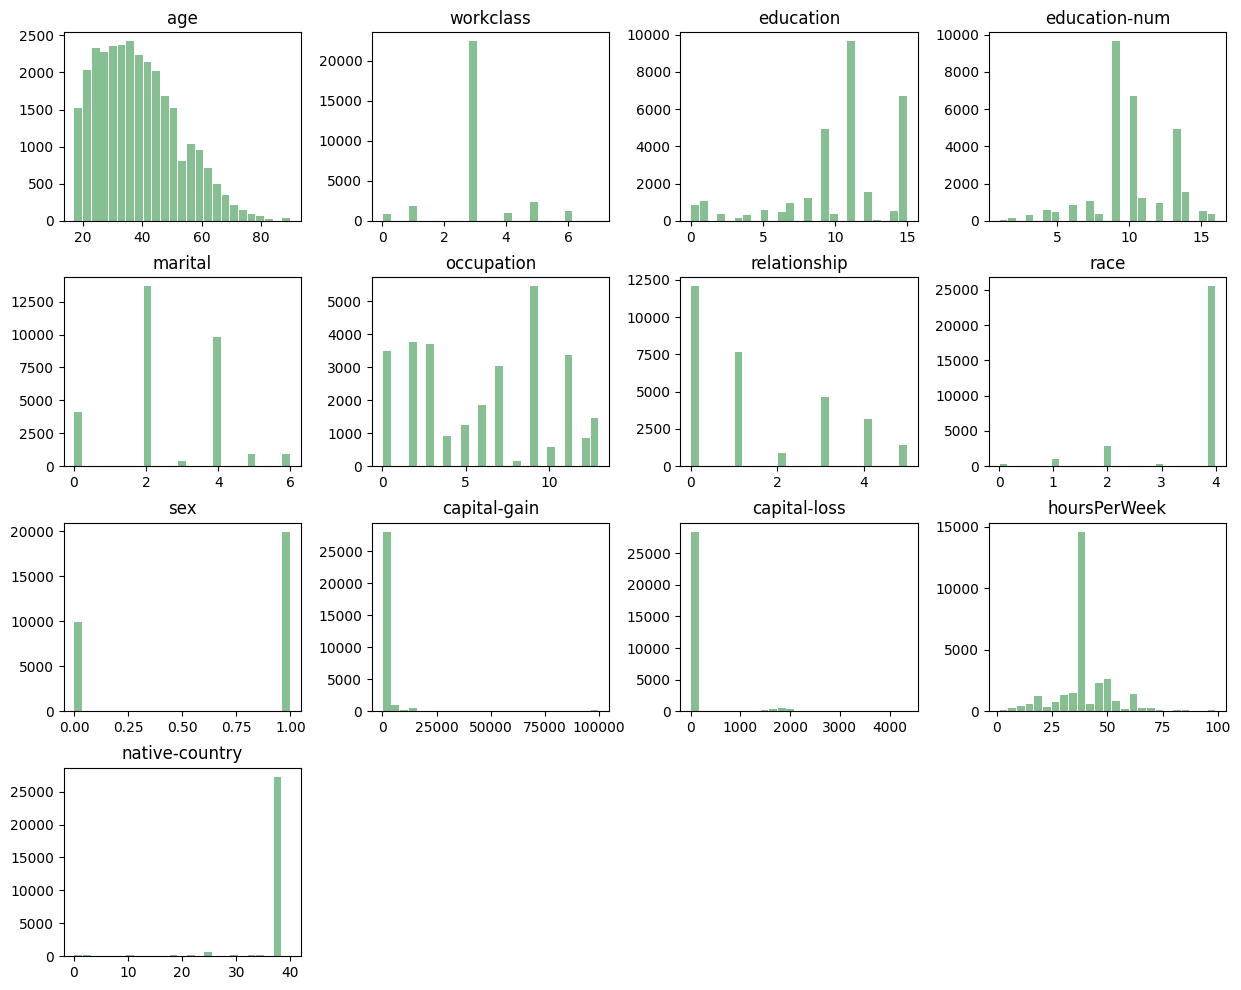

In [23]:
people_data.hist(bins=25, grid=False, figsize=(15,12), color='#86bf92', zorder=2, rwidth=0.9)

10 Data normalization

In [24]:
numeric_people_data = people_data.drop(columns=['education', 'native-country', 'occupation', 'relationship','workclass', 'salary'])

normalized_people_data = (numeric_people_data - numeric_people_data.mean()) / numeric_people_data.std()

normalized_people_data

,age,education-num,marital,race,sex,capital-gain,capital-loss,hoursPerWeek
0,0.030660,1.135745,0.918457,0.393610,0.703222,0.144193,-0.215547,-0.035288
1,0.836403,1.135745,-0.407149,0.393610,0.703222,-0.146220,-0.215547,-2.228952
2,-0.042589,-0.419659,-1.732754,0.393610,0.703222,-0.146220,-0.215547,-0.035288
3,1.056151,-1.197362,-0.407149,-1.962521,0.703222,-0.146220,-0.215547,-0.035288
4,-0.775082,1.135745,-0.407149,-1.962521,-1.421978,-0.146220,-0.215547,-0.035288
...,...,...,...,...,...,...,...,...
29820,0.689904,1.135745,-0.407149,0.393610,0.703222,-0.146220,-0.215547,-0.035288
29821,-0.482085,-0.030808,-1.732754,0.393610,-1.421978,-0.146220,-0.215547,-0.847756
29822,0.616655,-0.419659,-1.732754,0.393610,-1.421978,-0.146220,-0.215547,-0.441522
29823,-0.042589,1.913448,-0.407149,0.393610,-1.421978,-0.146220,-0.215547,-0.035288


11-1 claculate mean and std of people with more than 50K salary

In [25]:
people_with_more_than_50_salary = people_data.loc[people_data['salary'] == '>50K']

numeric_people_with_more_than_50_salary = people_with_more_than_50_salary.drop(columns=['salary'])

mean_people_with_more_than_50_salary = numeric_people_with_more_than_50_salary.mean()

std_people_with_more_than_50_salary = numeric_people_with_more_than_50_salary.std()

11-2 claculate mean and std of people with less than 50K salary

In [26]:
people_with_less_than_50_salary = people_data.loc[people_data['salary'] == '<=50K']

numeric_people_with_less_than_50_salary = people_with_less_than_50_salary.drop(columns=['salary'])

mean_people_with_less_than_50_salary = numeric_people_with_less_than_50_salary.mean()

std_people_with_less_than_50_salary = numeric_people_with_less_than_50_salary.std()

In [27]:
numeric_with_more_than_50_salary = (numeric_people_with_more_than_50_salary - numeric_people_with_more_than_50_salary.mean()) / numeric_people_with_more_than_50_salary.std()
numeric_with_less_than_50_salary = (numeric_people_with_less_than_50_salary - numeric_people_with_less_than_50_salary.mean()) / numeric_people_with_less_than_50_salary.std()

In [28]:
numeric_people_with_less_than_50_salary

,age,workclass,education,education-num,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hoursPerWeek,native-country
0,39,6,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,9,13,2,3,0,4,1,0,0,13,38
2,38,3,11,9,0,5,1,4,1,0,0,40,38
3,53,3,1,7,2,5,0,2,1,0,0,40,38
4,28,3,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29820,48,1,9,13,2,9,0,4,1,0,0,40,38
29821,32,3,15,10,0,9,1,4,0,0,0,30,38
29822,47,1,11,9,0,0,4,4,0,0,0,35,38
29823,38,3,14,15,2,11,5,4,0,0,0,40,38


In [29]:
numeric_people_with_more_than_50_salary.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hoursPerWeek', 'native-country'],
      dtype='object')

11 PDF charts of different characteristics for people with salary more than 50K and less than 50K

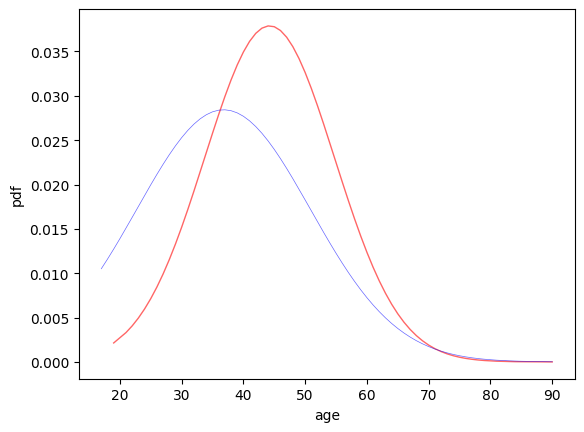

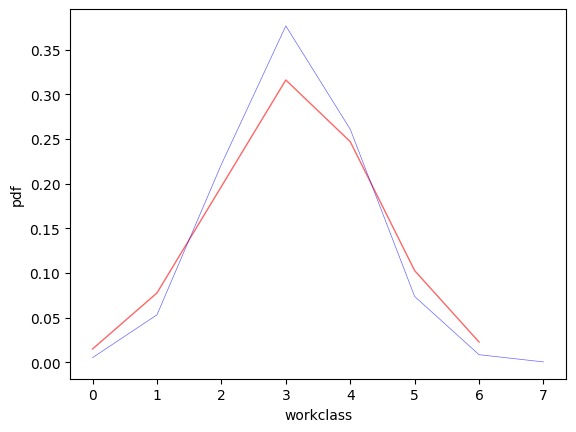

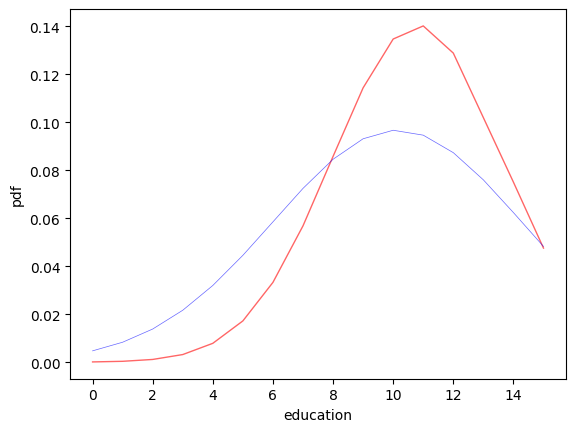

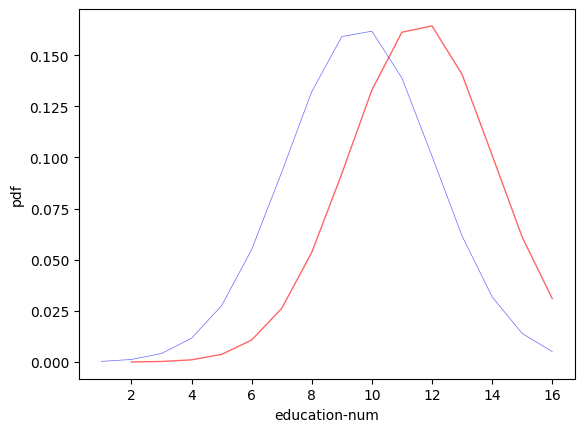

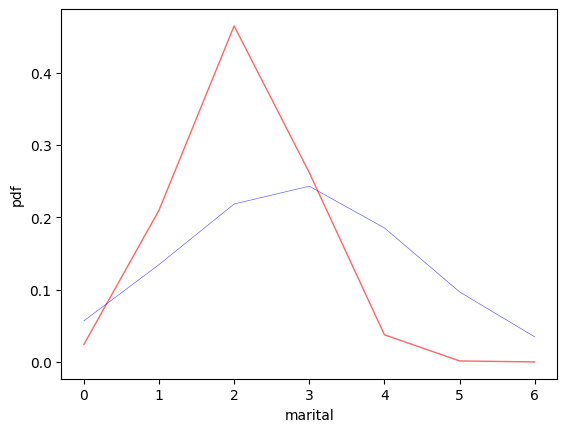

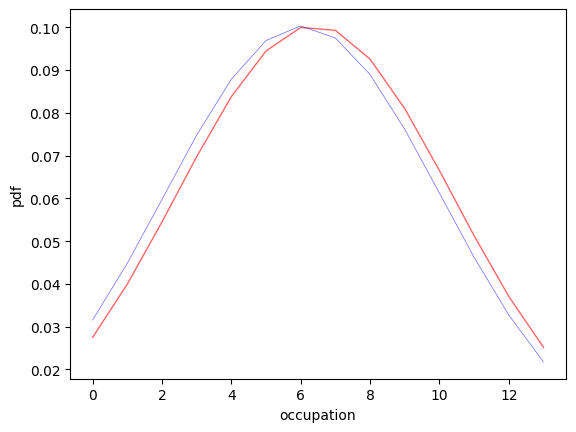

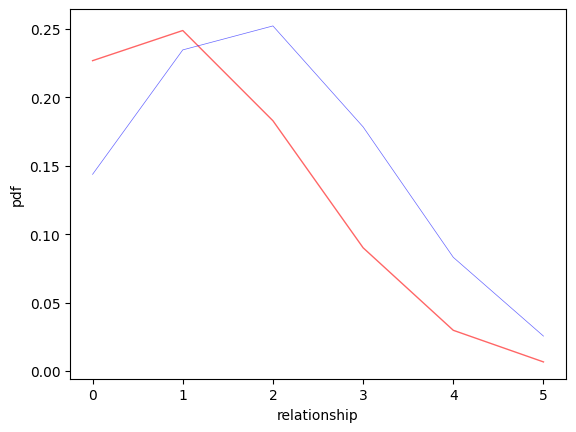

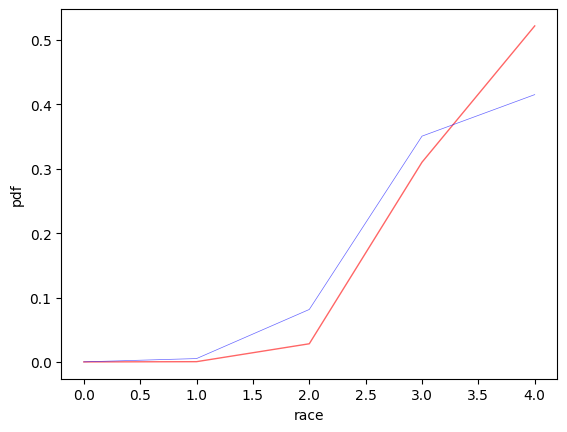

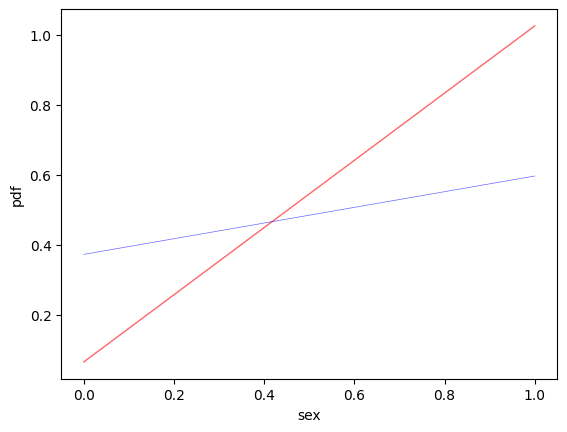

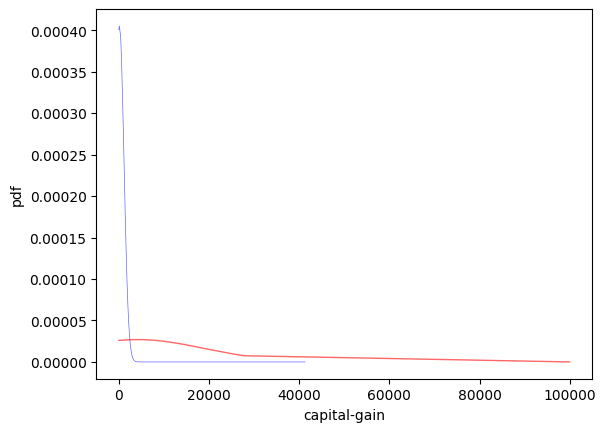

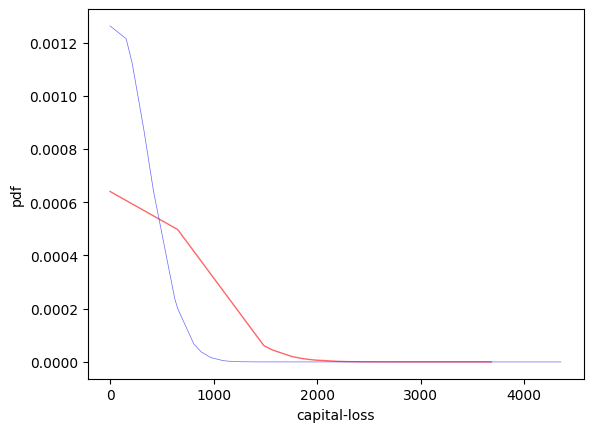

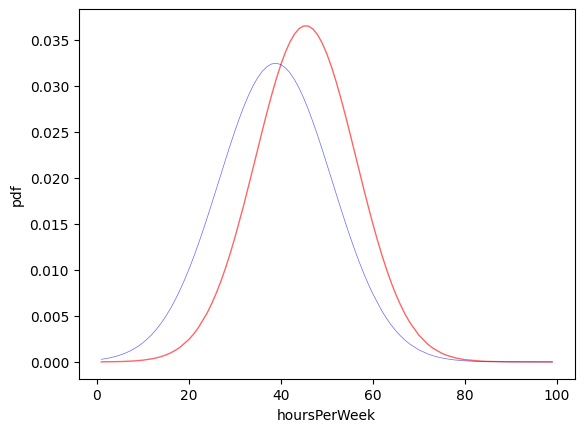

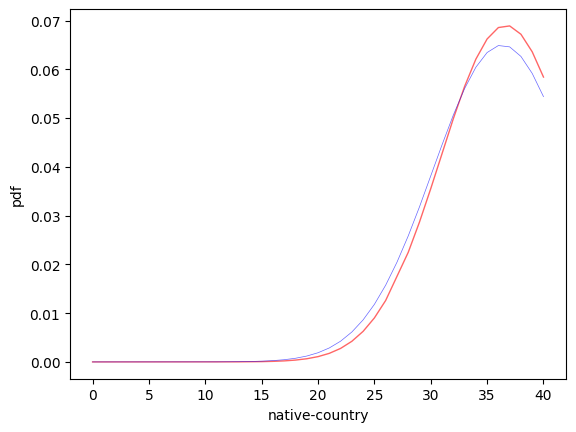

In [30]:
cols = numeric_people_with_more_than_50_salary.columns
for i in range(len(cols)):
    fig, ax = plt.subplots(1, 1)
    plt.xlabel(numeric_people_with_more_than_50_salary.columns[i])
    plt.ylabel("pdf")
    
    x = numeric_people_with_more_than_50_salary.iloc[:, i].sort_values()
    ax.plot(x, norm.pdf(x, mean_people_with_more_than_50_salary[i], std_people_with_more_than_50_salary[i]),'r-', lw=1, alpha=0.6, label='norm pdf')

    x = numeric_people_with_less_than_50_salary.iloc[:, i].sort_values()
    ax.plot(x, norm.pdf(x, mean_people_with_less_than_50_salary[i], std_people_with_less_than_50_salary[i]),'b-', lw=0.5, alpha=0.6, label='norm pdf')

In [31]:
test_data = pd.read_csv("./test.csv")
read_salaries = test_data['salary']

In [32]:
test_data['sex'] = test_data['sex'].astype('category')
test_data['sex'] = test_data['sex'].cat.codes

test_data['workclass'] = test_data['workclass'].astype('category')
test_data['workclass'] = test_data['workclass'].cat.codes

test_data['education'] = test_data['education'].astype('category')
test_data['education'] = test_data['education'].cat.codes

test_data['occupation'] = test_data['occupation'].astype('category')
test_data['occupation'] = test_data['occupation'].cat.codes

test_data['race'] = test_data['race'].astype('category')
test_data['race'] = test_data['race'].cat.codes

test_data['marital-status'] = test_data['marital-status'].astype('category')
test_data['marital-status'] = test_data['marital-status'].cat.codes

test_data['relationship'] = test_data['relationship'].astype('category')
test_data['relationship'] = test_data['relationship'].cat.codes

test_data['native-country'] = test_data['native-country'].astype('category')
test_data['native-country'] = test_data['native-country'].cat.codes

In [44]:
numeric_cols = ['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'native-country', 'hours-per-week']

for col in numeric_cols:
    col_data = test_data[col]
    index = numeric_cols.index(col)
    probs_morethan50 = [ norm.pdf(data, mean_people_with_more_than_50_salary[index], std_people_with_more_than_50_salary[index]) for data in col_data]
    probs_lessthan50 = [ norm.pdf(data, mean_people_with_less_than_50_salary[index], std_people_with_less_than_50_salary[index]) for data in col_data]
    
    diff = np.array(probs_morethan50)- np.array(probs_lessthan50)
    out = [("<=50K" if k<=0 else ">50K") for k in diff]
    
    if(col == 'capital-gain'):
        best_predict = out
    
    s = 0
    
    for i in range(col_data.size):
          s += (td[i] == out[i]) 
            
    print(col)
    print(s)
    print(s/col_data.size)
    print("------------------")


age
1699
0.6209795321637427
------------------
workclass
1718
0.6279239766081871
------------------
education
1401
0.5120614035087719
------------------
education-num
1946
0.7112573099415205
------------------
marital-status
1902
0.6951754385964912
------------------
occupation
1489
0.5442251461988304
------------------
relationship
1422
0.5197368421052632
------------------
race
944
0.34502923976608185
------------------
sex
1369
0.5003654970760234
------------------
capital-gain
2139
0.7817982456140351
------------------
capital-loss
2071
0.7569444444444444
------------------
native-country
2049
0.7489035087719298
------------------
hours-per-week
1171
0.4279970760233918
------------------


12 CAPITAL GAIN can predict salary better than other.

In [54]:
df = pd.DataFrame (best_predict, columns = ['salary'])
df.to_csv('./salary_prediction.csv')